## Using H1 fullsim as input


Trying out things from Ben Nachman's example.

This uses the H1 fullsim MC as input.

Uses set of variables is E, pt, pz, Empz (redundant but useful?) for both HFS and electron as well as delta phi between HFS and electron.


This is the main NN training notebook.


Training target variables are   log(x)    AND    log(Q2)





In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from matplotlib import rc
from numpy import inf
import os

from os import listdir


import uproot3

import matplotlib as mpl



In [2]:


#has_gpu = False

has_gpu = True



#--- Hyperparameter settings.

#max_events =   120000
#max_events =   600000
max_events =  3000000
#max_events = 15000000
#max_events = 1e9


learning_rate_setval = 1e-4
batch_size_setval = 128
max_epochs = 5000
dropout_setval = 0.0



In [3]:
%%time


input_file = 'h1-fullsim-2021-07-19/h1-fullsim-allfiles.root'

ur_file = uproot3.open(input_file)

print (ur_file.keys()) 
ur_tree = ur_file['Django/minitree']
print(ur_tree)
ur_tree.show()


#pandas_df   =  ur_tree.pandas.df(['*'], entrystop=max_events,flatten=True)

pandas_df   =  ur_tree.pandas.df(
    ['gene_px','gene_py','gene_pz',
     'e_px','e_py','e_pz',
     'HFS_px','HFS_py','HFS_pz','HFS_E',
     'gen_Q2',
     'gen_y',
     'Empz',
     'Q2_e','y_e',
     'Q2_da','y_da',
     'Q2_sigma','y_sigma',     
    ],
    entrystop=max_events,flatten=True)

print('\n\n Number of entries in pandas_df:  %d ' % pandas_df.shape[0] )


[b'Django;1']
<TTree b'minitree' at 0x7f8c5b6dc400>
wgt                        (no streamer)              asdtype('>f4')
y_e                        (no streamer)              asdtype('>f4')
Q2_e                       (no streamer)              asdtype('>f4')
y_sigma                    (no streamer)              asdtype('>f4')
Q2_sigma                   (no streamer)              asdtype('>f4')
y_esigma                   (no streamer)              asdtype('>f4')
Q2_esigma                  (no streamer)              asdtype('>f4')
y_da                       (no streamer)              asdtype('>f4')
Q2_da                      (no streamer)              asdtype('>f4')
y_h                        (no streamer)              asdtype('>f4')
Q2_h                       (no streamer)              asdtype('>f4')
gen_x                      (no streamer)              asdtype('>f4')
gen_y                      (no streamer)              asdtype('>f4')
gen_Q2                     (no streamer)           

In [4]:
pandas_df

,gene_px,gene_py,gene_pz,e_px,e_py,e_pz,HFS_px,HFS_py,HFS_pz,HFS_E,gen_Q2,gen_y,Empz,Q2_e,y_e,Q2_da,y_da,Q2_sigma,y_sigma
entry,,,,,,,,,,,,,,,,,,,
0,3.283574,5.129409,-10.929905,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,87.343498,0.575322,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,-5.531697,-3.367322,-2.631080,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,240.616425,0.841318,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,1.093026,7.108931,-14.778481,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,91.483292,0.434525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,4.031961,6.385868,-22.624577,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,67.741684,0.158043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,-8.811806,6.074530,-17.640022,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,165.209030,0.303108,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,-0.533504,9.412164,-22.844326,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,103.155602,0.138459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2999996,10.008983,-0.626768,-18.807287,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,138.370605,0.193510,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2999997,-2.409079,13.961668,-22.114153,-2.288183,13.32194,-21.122099,4.869855,-11.200771,70.466301,76.805573,229.039917,0.123602,52.538315,218.307251,0.163061,226.451233,0.131839,207.780716,0.12066


In [5]:
n_before_empz = pandas_df.shape[0]
pandas_df = pandas_df.query('Empz>0')
n_after_empz = pandas_df.shape[0]
frac_after_empz = n_after_empz / n_before_empz
print('\n Fraction passing Empz>0 :  %d / %d = %8.4f' % (n_after_empz, n_before_empz, frac_after_empz))


 Fraction passing Empz>0 :  838454 / 3000000 =   0.2795


In [6]:
pandas_df

,gene_px,gene_py,gene_pz,e_px,e_py,e_pz,HFS_px,HFS_py,HFS_pz,HFS_E,gen_Q2,gen_y,Empz,Q2_e,y_e,Q2_da,y_da,Q2_sigma,y_sigma
entry,,,,,,,,,,,,,,,,,,,
9,7.991641,41.257713,-8.253663,7.896643,40.699341,-8.267031,-8.369857,-41.172997,234.253250,239.119141,1908.471558,0.074625,55.407475,1877.214722,0.084392,1872.364868,0.086757,1884.270386,0.087820
13,16.607563,7.054676,-2.758050,17.386559,7.380891,-3.096447,-12.415076,-13.259241,243.888321,280.390930,855.343079,0.619355,58.739544,885.630615,0.597157,812.146057,0.630583,942.419250,0.621432
20,-16.871563,29.083319,-11.572786,-16.517221,28.493423,-11.005733,3.738783,-14.740218,116.293289,119.632317,1324.020386,0.121437,49.227589,1309.299072,0.171546,1364.621338,0.136541,1163.892822,0.068047
21,5.742672,-13.619509,-19.351875,5.832151,-13.807648,-19.644226,-6.197764,15.308520,78.376953,82.877342,275.943939,0.070863,48.854145,279.604614,0.196490,318.636963,0.084321,247.460953,0.092119
22,-38.008579,-59.328259,127.920113,-35.669365,-56.400394,122.574600,36.352924,56.511467,56.111095,90.331985,15122.667969,0.671715,51.219391,14469.998047,0.692239,15669.503906,0.666726,13423.892578,0.668255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999976,-5.290115,-12.381145,-9.362154,-5.533272,-13.044909,-9.979531,8.722871,12.065405,26.683153,53.502899,388.435303,0.533311,54.130688,405.823792,0.505237,423.976837,0.483105,397.962311,0.495463
2999979,-3.801800,-14.766795,-18.668730,-3.697986,-14.411146,-18.399315,5.169672,20.041523,35.910156,50.278599,300.061981,0.225125,56.429771,290.501160,0.238019,306.083588,0.197147,296.973022,0.254625
2999984,-9.807976,25.451473,-17.215633,-9.789785,25.457283,-17.253466,7.708049,-26.195274,303.586731,310.849670,830.144775,0.103812,56.790146,829.119995,0.102768,806.021484,0.127764,853.004333,0.127891


In [7]:
%%time

pandas_df.eval( 'gene_e = sqrt( gene_px*gene_px + gene_py*gene_py + gene_pz*gene_pz)', inplace=True )

pandas_df.eval( 'e_e = sqrt( e_px*e_px + e_py*e_py + e_pz*e_pz)', inplace=True )

pandas_df.eval( 'e_pt = sqrt( e_px*e_px + e_py*e_py)', inplace=True )

pandas_df.eval( 'e_phi = arctan2( e_py, e_px )', inplace=True )

pandas_df.eval( 'gene_pt = sqrt( gene_px*gene_px + gene_py*gene_py)', inplace=True )
pandas_df.eval( 'gene_phi = arctan2( gene_py, gene_px )', inplace=True )

pandas_df.eval( 'HFS_phi = arctan2( HFS_py, HFS_px )', inplace=True )
pandas_df.eval( 'HFS_pt = sqrt( HFS_px*HFS_px + HFS_py*HFS_py)', inplace=True )

pandas_df.eval( 'dphi = e_phi - HFS_phi', inplace=True )
pandas_df.eval( 'dphi = (abs(dphi)<3.14159265)*(dphi)+(dphi>3.14159265)*(dphi-2*3.14159265) + (dphi<-3.14159265)*(dphi+2*3.14159265)', inplace=True )
pandas_df.eval( 'dphi = (dphi>0)*dphi + (dphi<0)*(dphi+2*3.14159265)', inplace=True )


pandas_df.eval( 'gen_dphi = 3.141592653589793', inplace=True )

pandas_df.eval( 'HFS_Empz = HFS_E - HFS_pz', inplace=True )
pandas_df.eval( 'e_Empz = e_e - e_pz', inplace=True )

pandas_df.eval( 'gene_Empz = gene_e - gene_pz', inplace=True )

pandas_df.eval( 's = 4*27.6*920', inplace=True)
pandas_df.eval( 'gen_x = gen_Q2/(s*gen_y)', inplace=True)

pandas_df.eval( 'gen_log_x = log(gen_x)', inplace=True )

pandas_df.eval( 'gen_log_Q2 = log(gen_Q2)', inplace=True )

pandas_df.eval( 'rot_pt1 = 0.70710678 * HFS_pt - 0.70710678 * e_pt', inplace=True )
pandas_df.eval( 'rot_pt2 = 0.70710678 * HFS_pt + 0.70710678 * e_pt', inplace=True )

pandas_df.eval( 'rot_Empz1 = 0.70710678 * HFS_Empz - 0.70710678 * e_Empz', inplace=True )
pandas_df.eval( 'rot_Empz2 = 0.70710678 * HFS_Empz + 0.70710678 * e_Empz', inplace=True )


CPU times: user 288 ms, sys: 22.1 ms, total: 310 ms
Wall time: 129 ms


## Do some cleaning

In [8]:
%%time

pandas_df = pandas_df.query('Empz>45')


pandas_df = pandas_df.query('gen_y > 0 and gen_y < 1.0')


CPU times: user 70.8 ms, sys: 46.9 ms, total: 118 ms
Wall time: 113 ms


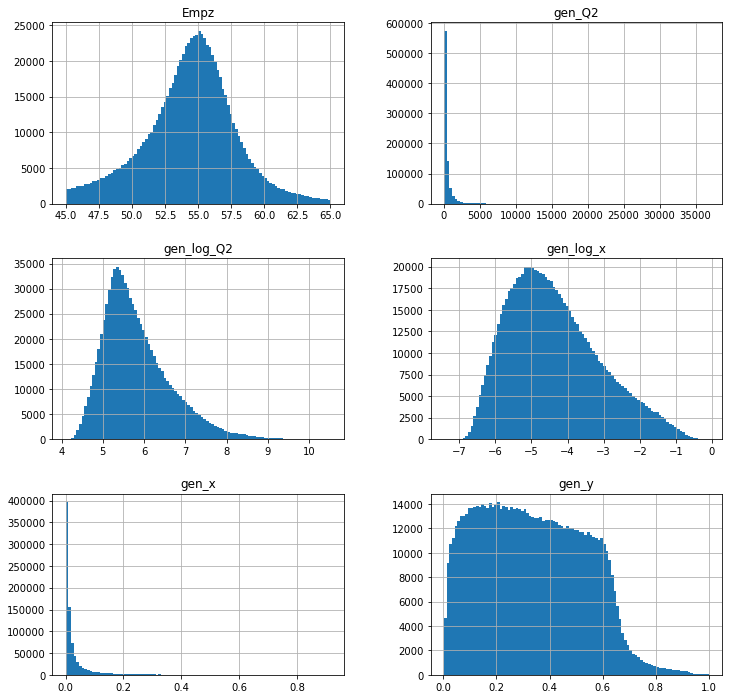

In [9]:
pandas_df.hist(figsize=(12,12), bins=100, column=['Empz','gen_y','gen_x','gen_log_x','gen_Q2','gen_log_Q2'])
plt.show()

In [10]:
pandas_df

,gene_px,gene_py,gene_pz,e_px,e_py,e_pz,HFS_px,HFS_py,HFS_pz,HFS_E,...,e_Empz,gene_Empz,s,gen_x,gen_log_x,gen_log_Q2,rot_pt1,rot_pt2,rot_Empz1,rot_Empz2
entry,,,,,,,,,,,,,,,,,,,,,
9,7.991641,41.257713,-8.253663,7.896643,40.699341,-8.267031,-8.369857,-41.172997,234.253250,239.119141,...,50.541573,51.081085,101568.0,0.251793,-1.379150,7.554058,0.393705,59.024643,-32.297585,39.178993
13,16.607563,7.054676,-2.758050,17.386559,7.380891,-3.096447,-12.415076,-13.259241,243.888321,280.390930,...,22.236927,21.011444,101568.0,0.013597,-4.297904,6.751503,-0.511988,26.200180,10.087359,41.535122
20,-16.871563,29.083319,-11.572786,-16.517221,28.493423,-11.005733,3.738783,-14.740218,116.293289,119.632317,...,45.730652,47.131447,101568.0,0.107346,-2.231695,7.188428,-12.535378,34.041309,-29.975403,34.697502
21,5.742672,-13.619509,-19.351875,5.832151,-13.807648,-19.644226,-6.197764,15.308520,78.376953,82.877342,...,44.353752,43.702736,101568.0,0.038339,-3.261283,5.620198,1.079546,22.276957,-28.180584,34.545094
22,-38.008579,-59.328259,127.920113,-35.669365,-56.400394,122.574600,36.352924,56.511467,56.111095,90.331985,...,16.988434,18.121147,101568.0,0.221660,-1.506612,9.623950,0.326149,94.701012,12.185186,36.210457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999976,-5.290115,-12.381145,-9.362154,-5.533272,-13.044909,-9.979531,8.722871,12.065405,26.683153,53.502899,...,27.310944,25.761179,101568.0,0.007171,-4.937707,5.962127,0.507992,20.547291,-0.347328,38.276176
2999979,-3.801800,-14.766795,-18.668730,-3.697986,-14.411146,-18.399315,5.169672,20.041523,35.910156,50.278599,...,42.061333,42.773365,101568.0,0.013123,-4.333395,5.703989,4.115003,25.155735,-19.581831,39.901878
2999984,-9.807976,25.451473,-17.215633,-9.789785,25.457283,-17.253466,7.708049,-26.195274,303.586731,310.849670,...,49.527222,49.470119,101568.0,0.078732,-2.541705,6.721600,0.021936,38.594284,-29.885361,40.156708


## Set up machine learning stuff

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#-- Ben suggested to try this.  2021-08-07
from tensorflow.keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(patience=10,
               verbose=True,
               restore_best_weights=True)

import os

print(tf.config.list_physical_devices())

if has_gpu :
    os.environ['CUDA_VISIBLE_DEVICES']="0"
    physical_devices = tf.config.list_physical_devices('GPU') 
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

#####physical_devices = tf.config.list_physical_devices('CPU') 




[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Now feed in reco electron and reco HFS

This includes a variable transformation that decorrelates pt and Empz between the HFS and the electron.

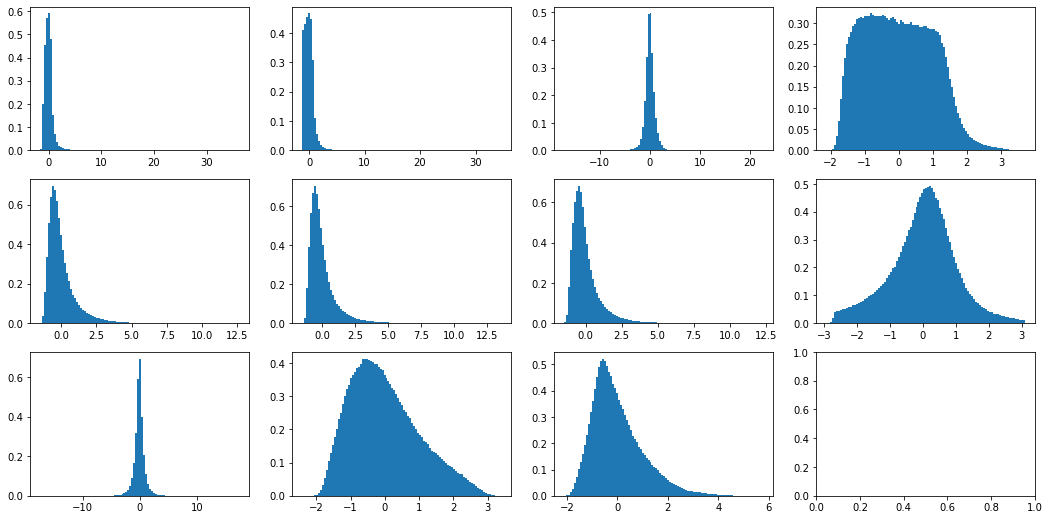

In [12]:
X3 = np.c_[ 
          pandas_df['e_pz'].to_numpy(),
          pandas_df['e_e'].to_numpy(),
          pandas_df['rot_pt1'].to_numpy(),
          pandas_df['rot_Empz1'].to_numpy(),
          pandas_df['HFS_pz'].to_numpy(),
          pandas_df['HFS_E'].to_numpy(),
          pandas_df['rot_pt2'].to_numpy(),
          pandas_df['rot_Empz2'].to_numpy(),
          pandas_df['dphi'].to_numpy(),
         ]

Y3 = np.c_[
    pandas_df['gen_log_x'].to_numpy(),
    pandas_df['gen_log_Q2'].to_numpy(),
]

scaler3 = StandardScaler()
scaler3.fit(X3)
X3 = scaler3.transform(X3)

#Y3 = Y3.reshape(-1,1)
scalerY3 = StandardScaler()
scalerY3.fit(Y3)
Y3 = scalerY3.transform(Y3)

GY3 = pandas_df['gen_y'].to_numpy()

X3_train, X3_test, Y3_train, Y3_test, GY3_train, GY3_test = train_test_split( X3, Y3, GY3, test_size=0.5)

fig,ax = plt.subplots(3,4,figsize=(18,9))
for i in range(4):
    ax[0][i].hist( X3[:,i],density=True,bins=100)
for i in range(4):
    ax[1][i].hist( X3[:,i+4],density=True,bins=100)

    
ax[2][0].hist( X3[:,8],density=True,bins=100)


    
ax[2][1].hist( Y3[:,0],density=True,bins=100)
    
ax[2][2].hist( Y3[:,1],density=True,bins=100)


plt.show()

In [13]:
model3 = Sequential()

#-- initial layer
model3.add(Dense(64, input_dim=9, activation='relu'))
model3.add(Dropout(dropout_setval))



#-- middle part
model3.add(Dense(128, activation='selu'))
model3.add(Dropout(dropout_setval))
model3.add(Dense(512, activation='selu'))
model3.add(Dropout(dropout_setval))
model3.add(Dense(1024, activation='selu'))
model3.add(Dropout(dropout_setval))
model3.add(Dense(512, activation='selu'))
model3.add(Dropout(dropout_setval))
model3.add(Dense(128, activation='selu'))
model3.add(Dropout(dropout_setval))




#-- final layers
model3.add(Dense(64, activation='selu'))
model3.add(Dense(2, activation='linear'))



opt3 = tf.keras.optimizers.Adam(learning_rate=learning_rate_setval)
myloss3 = tf.keras.losses.Huber()

model3.compile(loss=myloss3, optimizer=opt3, metrics=['accuracy'])

model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               66048     
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              5

In [14]:
%%time

hist3 = model3.fit(
    X3_train, Y3_train, 
    epochs=max_epochs, batch_size=batch_size_setval, verbose=1, 
    validation_data=(X3_test,Y3_test), 
    callbacks=[earlystopping] )

Epoch 1/5000
3273/3273 [==============================] - 10s 3ms/step - loss: 0.0108 - accuracy: 0.9292 - val_loss: 0.0068 - val_accuracy: 0.9526
Epoch 2/5000
3273/3273 [==============================] - 9s 3ms/step - loss: 0.0068 - accuracy: 0.9467 - val_loss: 0.0062 - val_accuracy: 0.9590
Epoch 3/5000
3273/3273 [==============================] - 9s 3ms/step - loss: 0.0063 - accuracy: 0.9525 - val_loss: 0.0059 - val_accuracy: 0.9588
Epoch 4/5000
3273/3273 [==============================] - 9s 3ms/step - loss: 0.0059 - accuracy: 0.9560 - val_loss: 0.0060 - val_accuracy: 0.9542
Epoch 5/5000
3273/3273 [==============================] - 9s 3ms/step - loss: 0.0057 - accuracy: 0.9575 - val_loss: 0.0054 - val_accuracy: 0.9613
Epoch 6/5000
3273/3273 [==============================] - 9s 3ms/step - loss: 0.0055 - accuracy: 0.9595 - val_loss: 0.0052 - val_accuracy: 0.9680
Epoch 7/5000
3273/3273 [==============================] - 9s 3ms/step - loss: 0.0054 - accuracy: 0.9605 - val_loss: 0.0054 

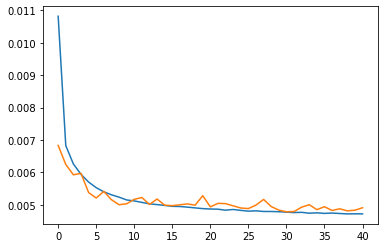

In [31]:
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])

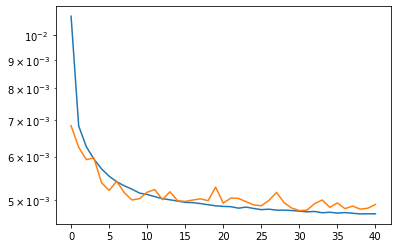

In [32]:
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.yscale('log')

In [33]:
tf.keras.models.save_model(model3,"model_output_h1_train_2d_v1a")

INFO:tensorflow:Assets written to: model_output_h1_train_2d_v1a/assets


In [34]:
mypreds3 = model3.predict(X3_test,batch_size=1000)

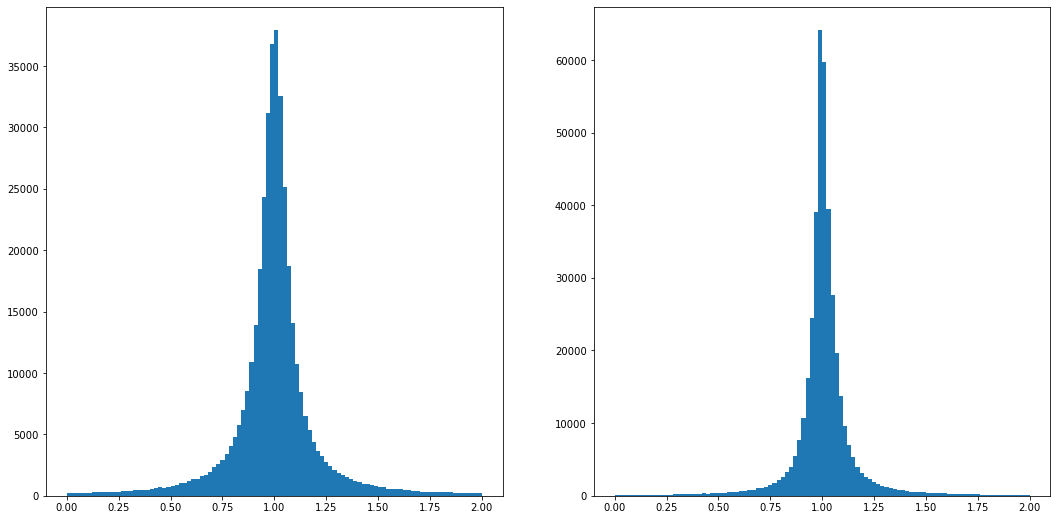

In [35]:
fig,ax = plt.subplots(1,2,figsize=(18,9))
ax[0].hist(mypreds3[:,0]/Y3_test[:,0],bins=100, range=[0,2] )
ax[1].hist(mypreds3[:,1]/Y3_test[:,1],bins=100, range=[0,2] )
plt.show()

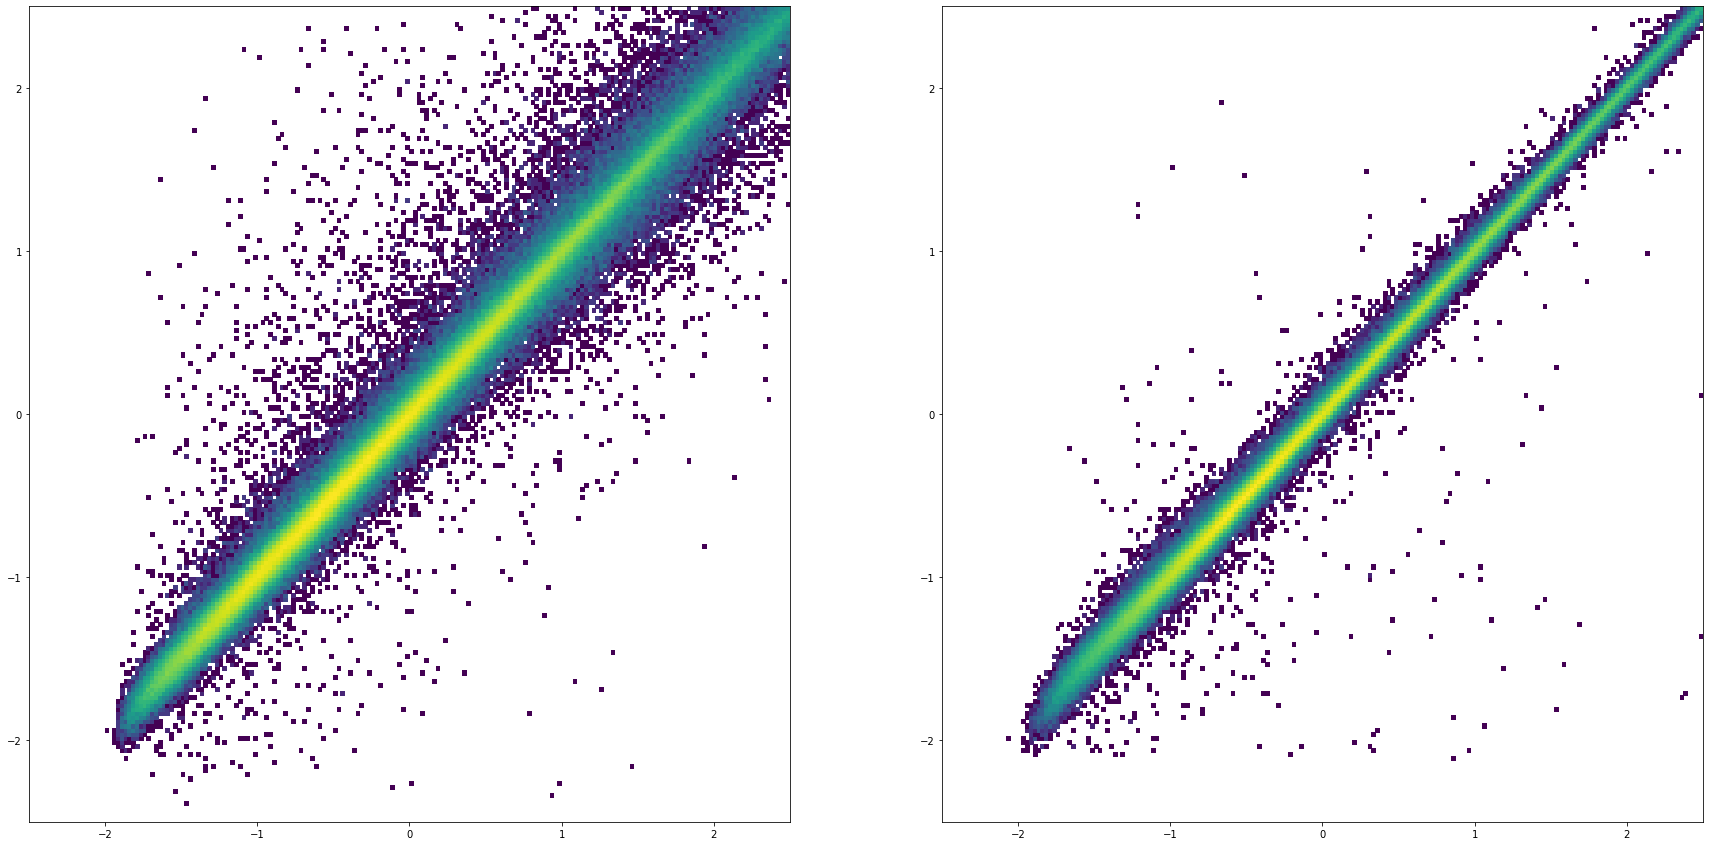

In [36]:
fig,ax = plt.subplots(1,2,figsize=(30,15))
ax[0].hist2d(mypreds3[:,0],Y3_test[:,0],bins=200, norm=mpl.colors.LogNorm(), range=([-2.5,2.5],[-2.5,2.5]))
ax[1].hist2d(mypreds3[:,1],Y3_test[:,1],bins=200, norm=mpl.colors.LogNorm(), range=([-2.5,2.5],[-2.5,2.5]))
plt.show()

In [37]:
inv_trans_Y = scalerY3.inverse_transform(Y3_test)
inv_trans_pred = scalerY3.inverse_transform(mypreds3)
true_vals = np.exp( inv_trans_Y )
pred_vals = np.exp( inv_trans_pred )

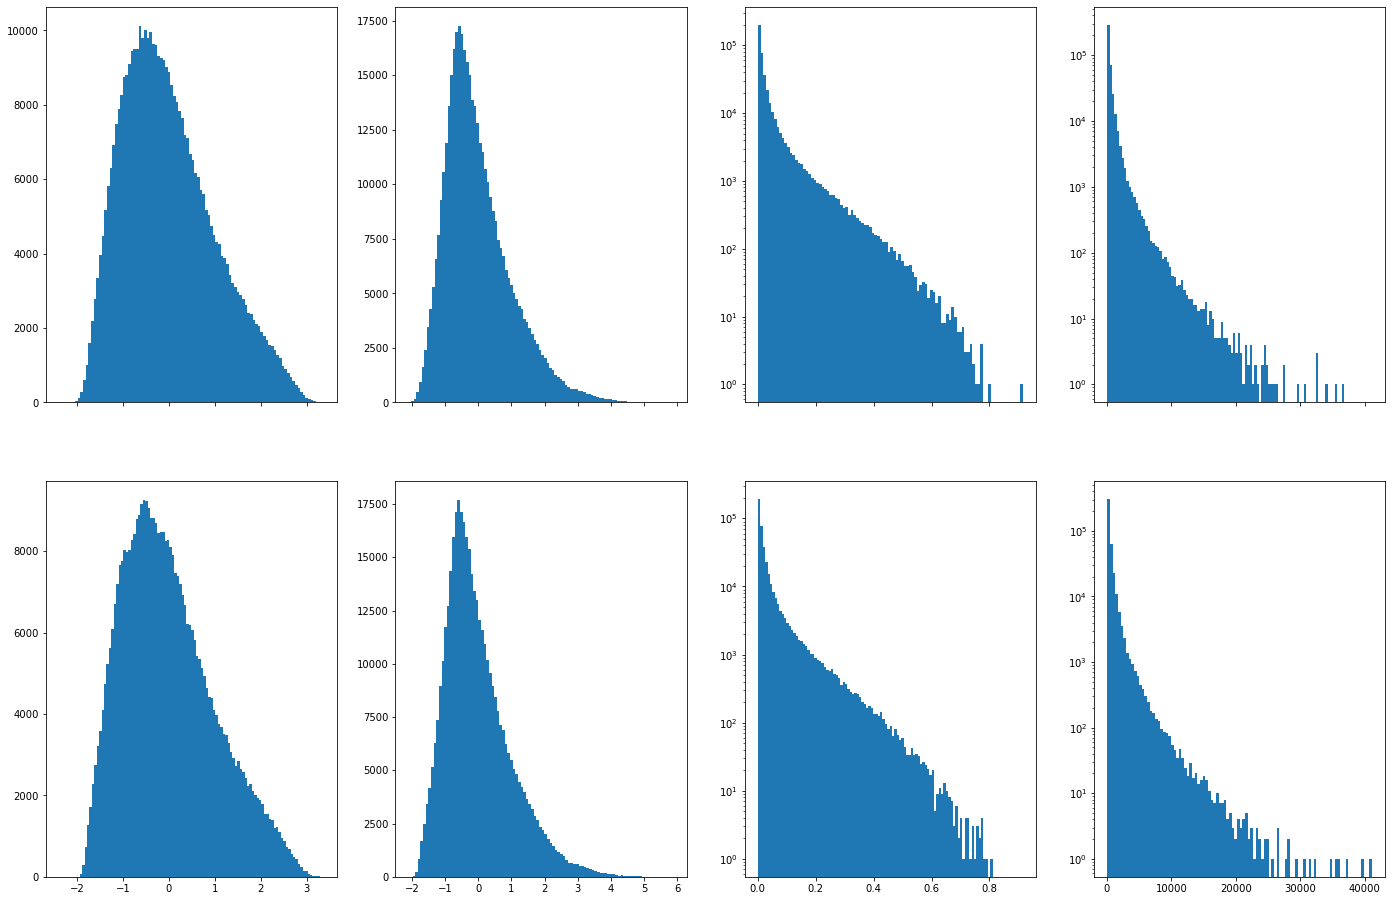

In [38]:
fig,ax = plt.subplots(2,4,figsize=(24,16), sharex='col')

ax[0][0].hist(Y3_test[:,0], bins=100)
ax[0][1].hist(Y3_test[:,1], bins=100)
ax[0][2].hist(true_vals[:,0], bins=100)
ax[0][3].hist(true_vals[:,1], bins=100)

ax[1][0].hist(mypreds3[:,0], bins=100)
ax[1][1].hist(mypreds3[:,1], bins=100)
ax[1][2].hist(pred_vals[:,0], bins=100)
ax[1][3].hist(pred_vals[:,1], bins=100)


ax[0][2].set_yscale('log')
ax[0][3].set_yscale('log')

ax[1][2].set_yscale('log')
ax[1][3].set_yscale('log')

plt.show()

## Plots of pred/true of training target variables : transformed log(x) and transformed log(Q2)

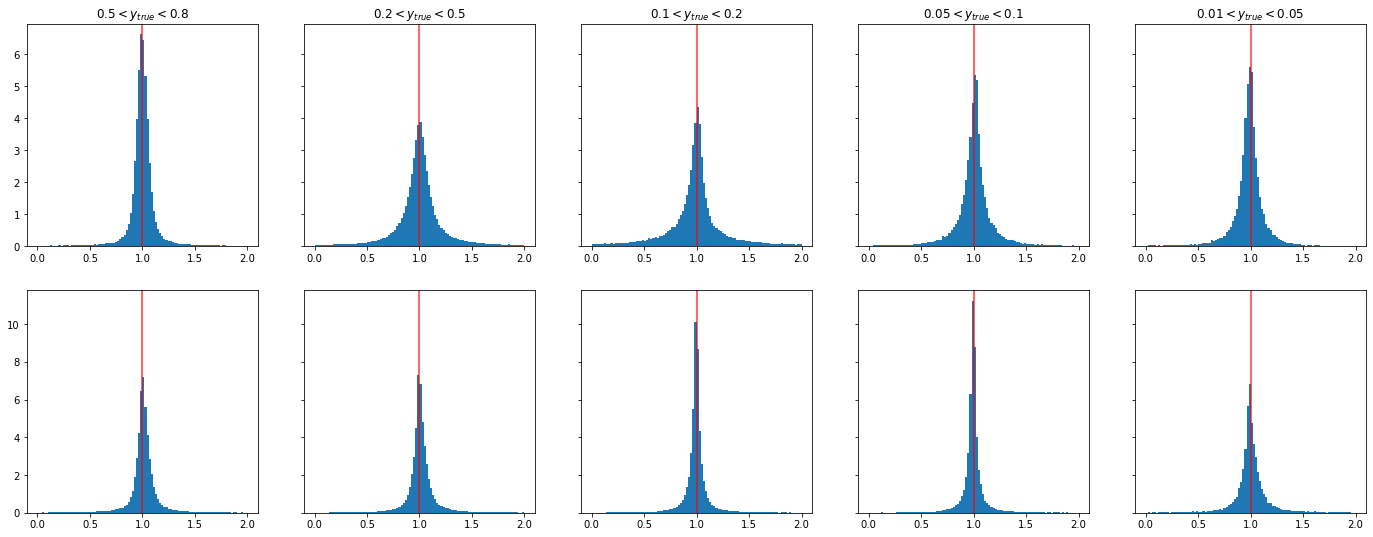

In [40]:
fig,ax = plt.subplots(2,5,figsize=(24,9),sharey='row')

ax[0][0].hist(mypreds3[:,0][(GY3_test > 0.5)*(GY3_test < 0.8)]/Y3_test[(GY3_test > 0.5)*(GY3_test < 0.8)][:,0],density=True,bins=100,range=(0,2))
ax[0][1].hist(mypreds3[:,0][(GY3_test > 0.2)*(GY3_test < 0.5)]/Y3_test[(GY3_test > 0.2)*(GY3_test < 0.5)][:,0],density=True,bins=100,range=(0,2))
ax[0][2].hist(mypreds3[:,0][(GY3_test > 0.1)*(GY3_test < 0.2)]/Y3_test[(GY3_test > 0.1)*(GY3_test < 0.2)][:,0],density=True,bins=100,range=(0,2))
ax[0][3].hist(mypreds3[:,0][(GY3_test > 0.05)*(GY3_test < 0.1)]/Y3_test[(GY3_test > 0.05)*(GY3_test < 0.1)][:,0],density=True,bins=100,range=(0,2))
ax[0][4].hist(mypreds3[:,0][(GY3_test > 0.01)*(GY3_test < 0.05)]/Y3_test[(GY3_test > 0.01)*(GY3_test < 0.05)][:,0],density=True,bins=100,range=(0,2))

ax[1][0].hist(mypreds3[:,1][(GY3_test > 0.5)*(GY3_test < 0.8)]/Y3_test[(GY3_test > 0.5)*(GY3_test < 0.8)][:,1],density=True,bins=100,range=(0,2))
ax[1][1].hist(mypreds3[:,1][(GY3_test > 0.2)*(GY3_test < 0.5)]/Y3_test[(GY3_test > 0.2)*(GY3_test < 0.5)][:,1],density=True,bins=100,range=(0,2))
ax[1][2].hist(mypreds3[:,1][(GY3_test > 0.1)*(GY3_test < 0.2)]/Y3_test[(GY3_test > 0.1)*(GY3_test < 0.2)][:,1],density=True,bins=100,range=(0,2))
ax[1][3].hist(mypreds3[:,1][(GY3_test > 0.05)*(GY3_test < 0.1)]/Y3_test[(GY3_test > 0.05)*(GY3_test < 0.1)][:,1],density=True,bins=100,range=(0,2))
ax[1][4].hist(mypreds3[:,1][(GY3_test > 0.01)*(GY3_test < 0.05)]/Y3_test[(GY3_test > 0.01)*(GY3_test < 0.05)][:,1],density=True,bins=100,range=(0,2))



ax[0][0].set_title('$0.5<y_{true}<0.8$')
ax[0][1].set_title('$0.2<y_{true}<0.5$')
ax[0][2].set_title('$0.1<y_{true}<0.2$')
ax[0][3].set_title('$0.05<y_{true}<0.1$')
ax[0][4].set_title('$0.01<y_{true}<0.05$')


for i in range(5):
    ax[0][i].axvline(1.0,color='red',lw=2,alpha=0.6)
    ax[1][i].axvline(1.0,color='red',lw=2,alpha=0.6)
    
plt.show()



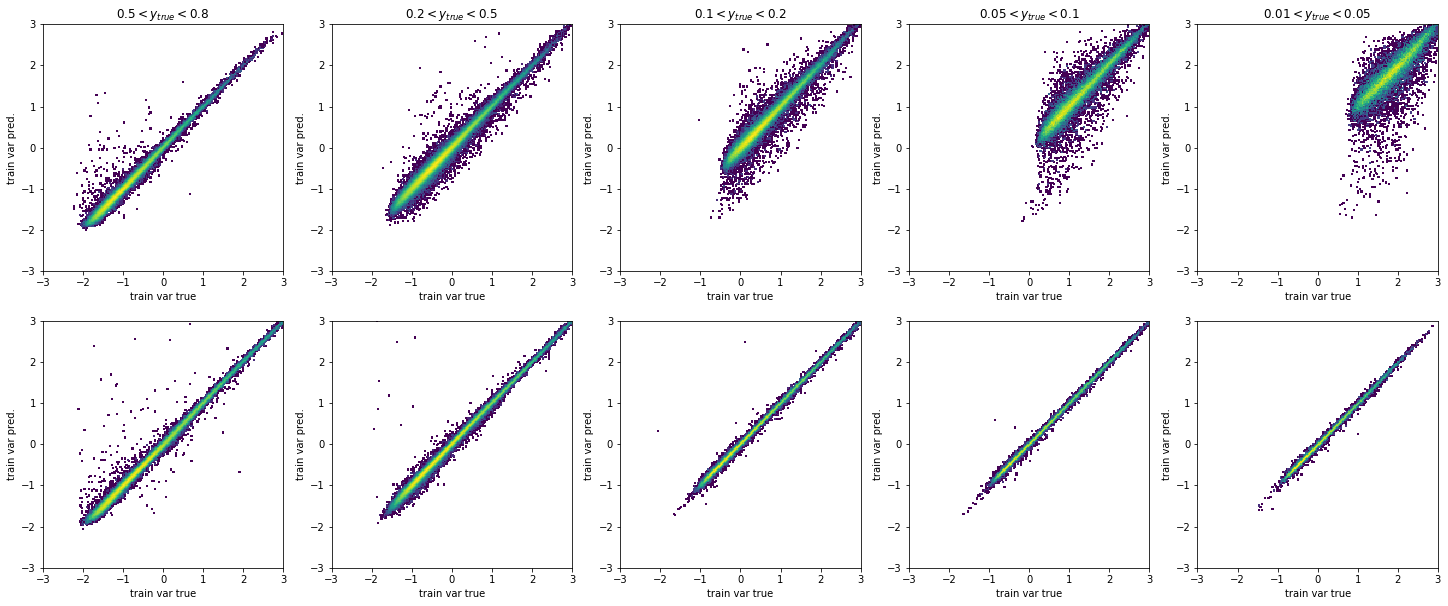

In [41]:
fig,ax = plt.subplots(2,5,figsize=(25,10))



ax[0][0].hist2d( Y3_test[(GY3_test > 0.5)*(GY3_test < 0.8)][:,0],
              mypreds3[:,0][(GY3_test > 0.5)*(GY3_test < 0.8)],                
              density=True,bins=200,range=([-3,3],[-3,3]), norm=mpl.colors.LogNorm())

ax[0][1].hist2d( Y3_test[(GY3_test > 0.2)*(GY3_test < 0.5)][:,0],
              mypreds3[:,0][(GY3_test > 0.2)*(GY3_test < 0.5)],                
              density=True,bins=200,range=([-3,3],[-3,3]), norm=mpl.colors.LogNorm())

ax[0][2].hist2d( Y3_test[(GY3_test > 0.1)*(GY3_test < 0.2)][:,0],
              mypreds3[:,0][(GY3_test > 0.1)*(GY3_test < 0.2)],                
              density=True,bins=200,range=([-3,3],[-3,3]), norm=mpl.colors.LogNorm())

ax[0][3].hist2d( Y3_test[(GY3_test > 0.05)*(GY3_test < 0.1)][:,0],
              mypreds3[:,0][(GY3_test > 0.05)*(GY3_test < 0.1)],                
              density=True,bins=200,range=([-3,3],[-3,3]), norm=mpl.colors.LogNorm())

ax[0][4].hist2d( Y3_test[(GY3_test > 0.01)*(GY3_test < 0.05)][:,0],
              mypreds3[:,0][(GY3_test > 0.01)*(GY3_test < 0.05)],                
              density=True,bins=200,range=([-3,3],[-3,3]), norm=mpl.colors.LogNorm())



ax[1][0].hist2d( Y3_test[(GY3_test > 0.5)*(GY3_test < 0.8)][:,1],
              mypreds3[:,1][(GY3_test > 0.5)*(GY3_test < 0.8)],                
              density=True,bins=200,range=([-3,3],[-3,3]), norm=mpl.colors.LogNorm())

ax[1][1].hist2d( Y3_test[(GY3_test > 0.2)*(GY3_test < 0.5)][:,1],
              mypreds3[:,1][(GY3_test > 0.2)*(GY3_test < 0.5)],                
              density=True,bins=200,range=([-3,3],[-3,3]), norm=mpl.colors.LogNorm())

ax[1][2].hist2d( Y3_test[(GY3_test > 0.1)*(GY3_test < 0.2)][:,1],
              mypreds3[:,1][(GY3_test > 0.1)*(GY3_test < 0.2)],                
              density=True,bins=200,range=([-3,3],[-3,3]), norm=mpl.colors.LogNorm())

ax[1][3].hist2d( Y3_test[(GY3_test > 0.05)*(GY3_test < 0.1)][:,1],
              mypreds3[:,1][(GY3_test > 0.05)*(GY3_test < 0.1)],                
              density=True,bins=200,range=([-3,3],[-3,3]), norm=mpl.colors.LogNorm())

ax[1][4].hist2d( Y3_test[(GY3_test > 0.01)*(GY3_test < 0.05)][:,1],
              mypreds3[:,1][(GY3_test > 0.01)*(GY3_test < 0.05)],                
              density=True,bins=200,range=([-3,3],[-3,3]), norm=mpl.colors.LogNorm())





ax[0][0].set_title('$0.5<y_{true}<0.8$')
ax[0][1].set_title('$0.2<y_{true}<0.5$')
ax[0][2].set_title('$0.1<y_{true}<0.2$')
ax[0][3].set_title('$0.05<y_{true}<0.1$')
ax[0][4].set_title('$0.01<y_{true}<0.05$')




for i in range(5):
    ax[0][i].set_ylabel('train var pred.')
    ax[0][i].set_xlabel('train var true')
    ax[1][i].set_ylabel('train var pred.')
    ax[1][i].set_xlabel('train var true')




    
plt.show()

## Plots of predicted and true physics variable : x

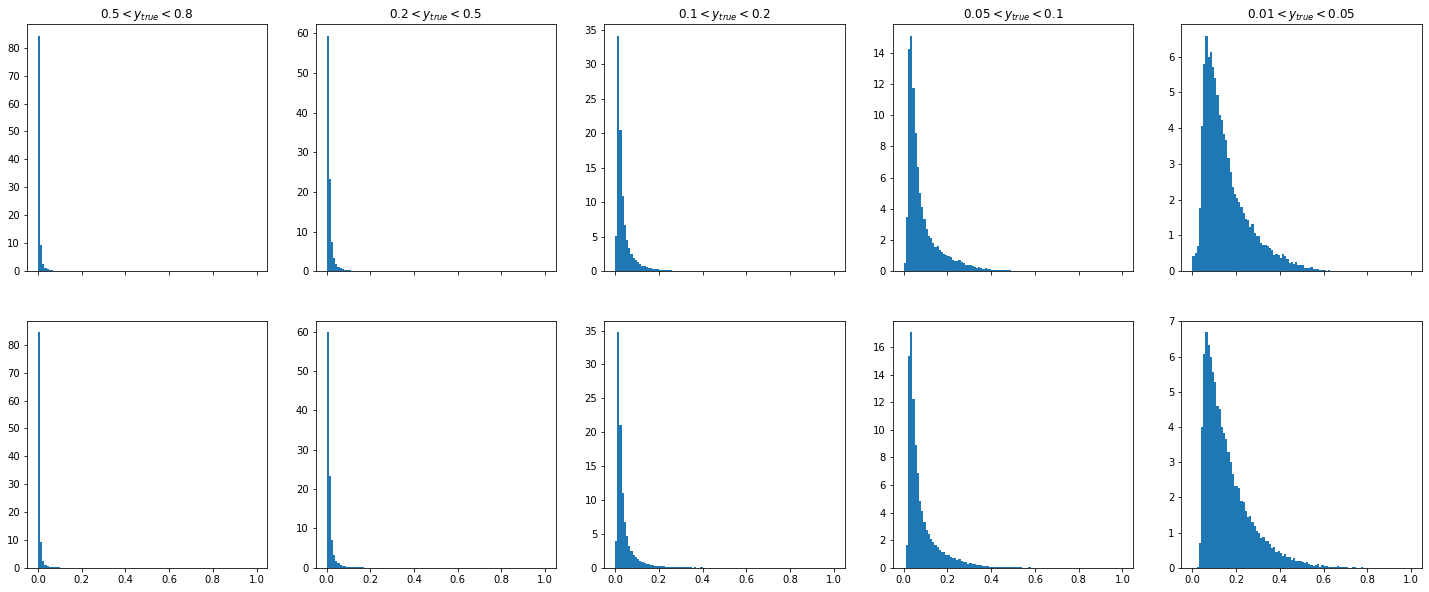

In [42]:
fig,ax = plt.subplots(2,5,figsize=(25,10),sharex='col')

ax[0][0].hist(pred_vals[:,0][(GY3_test > 0.5)*(GY3_test < 0.8)],density=True,bins=100,range=(0,1))
ax[0][1].hist(pred_vals[:,0][(GY3_test > 0.2)*(GY3_test < 0.5)],density=True,bins=100,range=(0,1))
ax[0][2].hist(pred_vals[:,0][(GY3_test > 0.1)*(GY3_test < 0.2)],density=True,bins=100,range=(0,1))
ax[0][3].hist(pred_vals[:,0][(GY3_test > 0.05)*(GY3_test < 0.1)],density=True,bins=100,range=(0,1))
ax[0][4].hist(pred_vals[:,0][(GY3_test > 0.01)*(GY3_test < 0.05)],density=True,bins=100,range=(0,1))

ax[1][0].hist(true_vals[:,0][(GY3_test > 0.5)*(GY3_test < 0.8)],density=True,bins=100,range=(0,1))
ax[1][1].hist(true_vals[:,0][(GY3_test > 0.2)*(GY3_test < 0.5)],density=True,bins=100,range=(0,1))
ax[1][2].hist(true_vals[:,0][(GY3_test > 0.1)*(GY3_test < 0.2)],density=True,bins=100,range=(0,1))
ax[1][3].hist(true_vals[:,0][(GY3_test > 0.05)*(GY3_test < 0.1)],density=True,bins=100,range=(0,1))
ax[1][4].hist(true_vals[:,0][(GY3_test > 0.01)*(GY3_test < 0.05)],density=True,bins=100,range=(0,1))


ax[0][0].set_title('$0.5<y_{true}<0.8$')
ax[0][1].set_title('$0.2<y_{true}<0.5$')
ax[0][2].set_title('$0.1<y_{true}<0.2$')
ax[0][3].set_title('$0.05<y_{true}<0.1$')
ax[0][4].set_title('$0.01<y_{true}<0.05$')


    
plt.show()

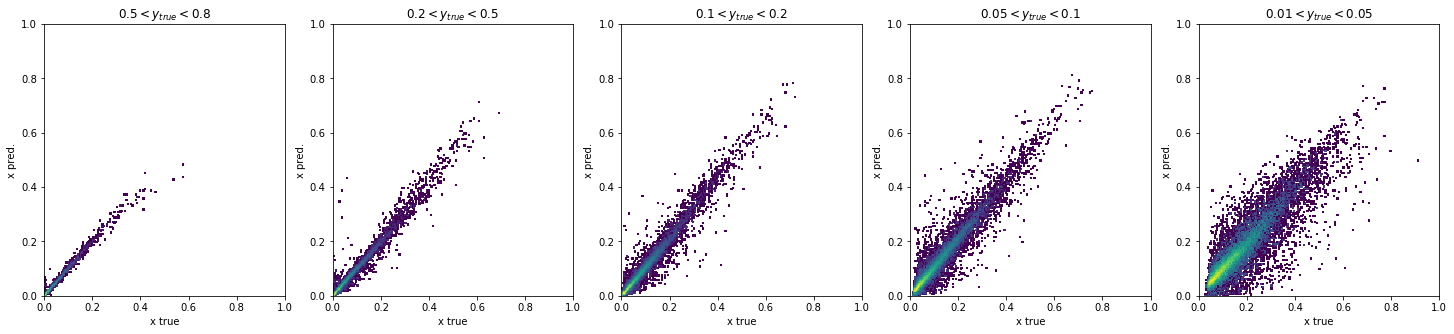

In [43]:
fig,ax = plt.subplots(1,5,figsize=(25,5))

ax[0].hist2d( true_vals[:,0][(GY3_test > 0.5)*(GY3_test < 0.8)],
              pred_vals[:,0][(GY3_test > 0.5)*(GY3_test < 0.8)],                
              density=True,bins=200,range=([0,1],[0,1]), norm=mpl.colors.LogNorm())

ax[1].hist2d( true_vals[:,0][(GY3_test > 0.2)*(GY3_test < 0.5)],
              pred_vals[:,0][(GY3_test > 0.2)*(GY3_test < 0.5)],                
              density=True,bins=200,range=([0,1],[0,1]), norm=mpl.colors.LogNorm())


ax[2].hist2d( true_vals[:,0][(GY3_test > 0.1)*(GY3_test < 0.2)],
              pred_vals[:,0][(GY3_test > 0.1)*(GY3_test < 0.2)],                
              density=True,bins=200,range=([0,1],[0,1]), norm=mpl.colors.LogNorm())


ax[3].hist2d( true_vals[:,0][(GY3_test > 0.05)*(GY3_test < 0.1)],
              pred_vals[:,0][(GY3_test > 0.05)*(GY3_test < 0.1)],                
              density=True,bins=200,range=([0,1],[0,1]), norm=mpl.colors.LogNorm())


ax[4].hist2d( true_vals[:,0][(GY3_test > 0.01)*(GY3_test < 0.05)],
              pred_vals[:,0][(GY3_test > 0.01)*(GY3_test < 0.05)],                
              density=True,bins=200,range=([0,1],[0,1]), norm=mpl.colors.LogNorm())








ax[0].set_title('$0.5<y_{true}<0.8$')
ax[1].set_title('$0.2<y_{true}<0.5$')
ax[2].set_title('$0.1<y_{true}<0.2$')
ax[3].set_title('$0.05<y_{true}<0.1$')
ax[4].set_title('$0.01<y_{true}<0.05$')

for i in range(5):
    ax[i].set_ylabel('x pred.')
    ax[i].set_xlabel('x true')


    
plt.show()

## Plots of predicted and true physics variable : Q2

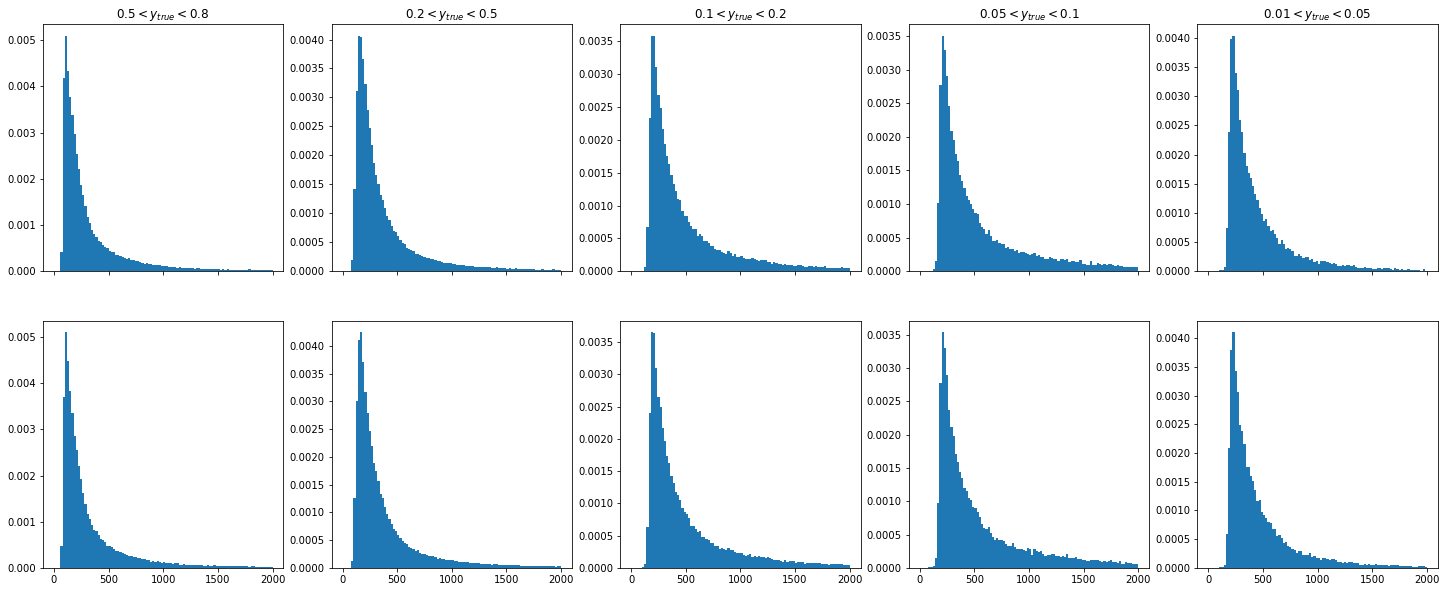

In [44]:
fig,ax = plt.subplots(2,5,figsize=(25,10),sharex='col')

xmax = 2000

ax[0][0].hist(pred_vals[:,1][(GY3_test > 0.5)*(GY3_test < 0.8)],density=True,bins=100,range=(0,xmax))
ax[0][1].hist(pred_vals[:,1][(GY3_test > 0.2)*(GY3_test < 0.5)],density=True,bins=100,range=(0,xmax))
ax[0][2].hist(pred_vals[:,1][(GY3_test > 0.1)*(GY3_test < 0.2)],density=True,bins=100,range=(0,xmax))
ax[0][3].hist(pred_vals[:,1][(GY3_test > 0.05)*(GY3_test < 0.1)],density=True,bins=100,range=(0,xmax))
ax[0][4].hist(pred_vals[:,1][(GY3_test > 0.01)*(GY3_test < 0.05)],density=True,bins=100,range=(0,xmax))

ax[1][0].hist(true_vals[:,1][(GY3_test > 0.5)*(GY3_test < 0.8)],density=True,bins=100,range=(0,xmax))
ax[1][1].hist(true_vals[:,1][(GY3_test > 0.2)*(GY3_test < 0.5)],density=True,bins=100,range=(0,xmax))
ax[1][2].hist(true_vals[:,1][(GY3_test > 0.1)*(GY3_test < 0.2)],density=True,bins=100,range=(0,xmax))
ax[1][3].hist(true_vals[:,1][(GY3_test > 0.05)*(GY3_test < 0.1)],density=True,bins=100,range=(0,xmax))
ax[1][4].hist(true_vals[:,1][(GY3_test > 0.01)*(GY3_test < 0.05)],density=True,bins=100,range=(0,xmax))


ax[0][0].set_title('$0.5<y_{true}<0.8$')
ax[0][1].set_title('$0.2<y_{true}<0.5$')
ax[0][2].set_title('$0.1<y_{true}<0.2$')
ax[0][3].set_title('$0.05<y_{true}<0.1$')
ax[0][4].set_title('$0.01<y_{true}<0.05$')


    
plt.show()

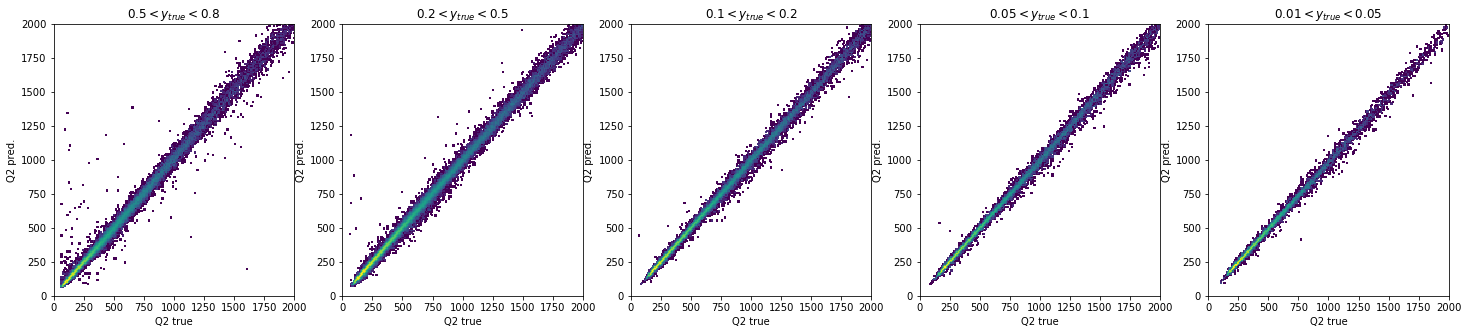

In [45]:
fig,ax = plt.subplots(1,5,figsize=(25,5))

axis_max = 2000

ax[0].hist2d( true_vals[:,1][(GY3_test > 0.5)*(GY3_test < 0.8)],
              pred_vals[:,1][(GY3_test > 0.5)*(GY3_test < 0.8)],                
              density=True,bins=200,range=([0,axis_max],[0,axis_max]), norm=mpl.colors.LogNorm())

ax[1].hist2d( true_vals[:,1][(GY3_test > 0.2)*(GY3_test < 0.5)],
              pred_vals[:,1][(GY3_test > 0.2)*(GY3_test < 0.5)],                
              density=True,bins=200,range=([0,axis_max],[0,axis_max]), norm=mpl.colors.LogNorm())


ax[2].hist2d( true_vals[:,1][(GY3_test > 0.1)*(GY3_test < 0.2)],
              pred_vals[:,1][(GY3_test > 0.1)*(GY3_test < 0.2)],                
              density=True,bins=200,range=([0,axis_max],[0,axis_max]), norm=mpl.colors.LogNorm())


ax[3].hist2d( true_vals[:,1][(GY3_test > 0.05)*(GY3_test < 0.1)],
              pred_vals[:,1][(GY3_test > 0.05)*(GY3_test < 0.1)],                
              density=True,bins=200,range=([0,axis_max],[0,axis_max]), norm=mpl.colors.LogNorm())


ax[4].hist2d( true_vals[:,1][(GY3_test > 0.01)*(GY3_test < 0.05)],
              pred_vals[:,1][(GY3_test > 0.01)*(GY3_test < 0.05)],                
              density=True,bins=200,range=([0,axis_max],[0,axis_max]), norm=mpl.colors.LogNorm())








ax[0].set_title('$0.5<y_{true}<0.8$')
ax[1].set_title('$0.2<y_{true}<0.5$')
ax[2].set_title('$0.1<y_{true}<0.2$')
ax[3].set_title('$0.05<y_{true}<0.1$')
ax[4].set_title('$0.01<y_{true}<0.05$')

for i in range(5):
    ax[i].set_ylabel('Q2 pred.')
    ax[i].set_xlabel('Q2 true')


    
plt.show()

## Plots of pred/true of physics variable:  x

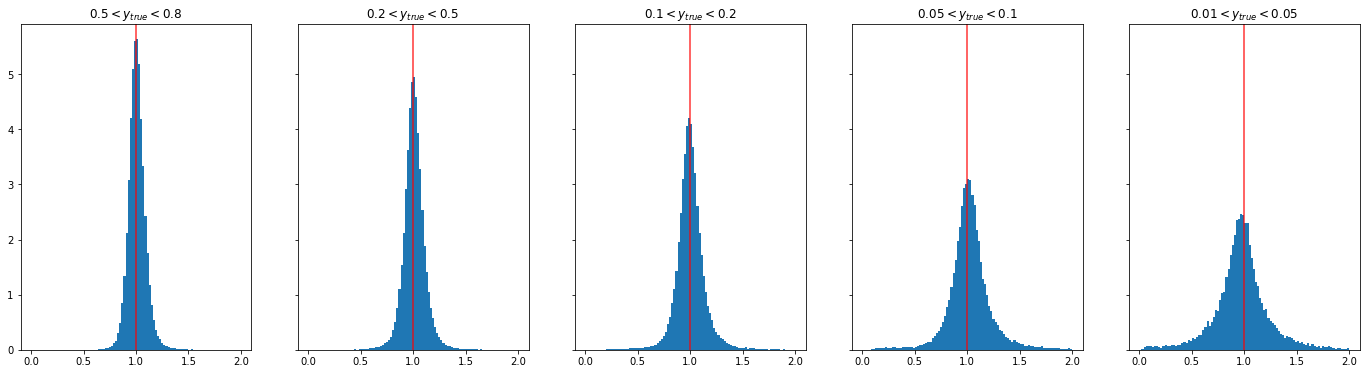

In [46]:
fig,ax = plt.subplots(1,5,figsize=(24,6),sharey='row')

ax[0].hist(pred_vals[:,0][(GY3_test > 0.5)*(GY3_test < 0.8)]/true_vals[:,0][(GY3_test > 0.5)*(GY3_test < 0.8)], density=True,bins=100,range=(0,2))
ax[1].hist(pred_vals[:,0][(GY3_test > 0.2)*(GY3_test < 0.5)]/true_vals[:,0][(GY3_test > 0.2)*(GY3_test < 0.5)], density=True,bins=100,range=(0,2))
ax[2].hist(pred_vals[:,0][(GY3_test > 0.1)*(GY3_test < 0.2)]/true_vals[:,0][(GY3_test > 0.1)*(GY3_test < 0.2)], density=True,bins=100,range=(0,2))
ax[3].hist(pred_vals[:,0][(GY3_test > 0.05)*(GY3_test < 0.1)]/true_vals[:,0][(GY3_test > 0.05)*(GY3_test < 0.1)], density=True,bins=100,range=(0,2))
ax[4].hist(pred_vals[:,0][(GY3_test > 0.01)*(GY3_test < 0.05)]/true_vals[:,0][(GY3_test > 0.01)*(GY3_test < 0.05)], density=True,bins=100,range=(0,2))






ax[0].set_title('$0.5<y_{true}<0.8$')
ax[1].set_title('$0.2<y_{true}<0.5$')
ax[2].set_title('$0.1<y_{true}<0.2$')
ax[3].set_title('$0.05<y_{true}<0.1$')
ax[4].set_title('$0.01<y_{true}<0.05$')


for i in range(5):
    ax[i].axvline(1.0,color='red',lw=2,alpha=0.6)
    
plt.show()

## Plots of pred/true of physics variable: Q2

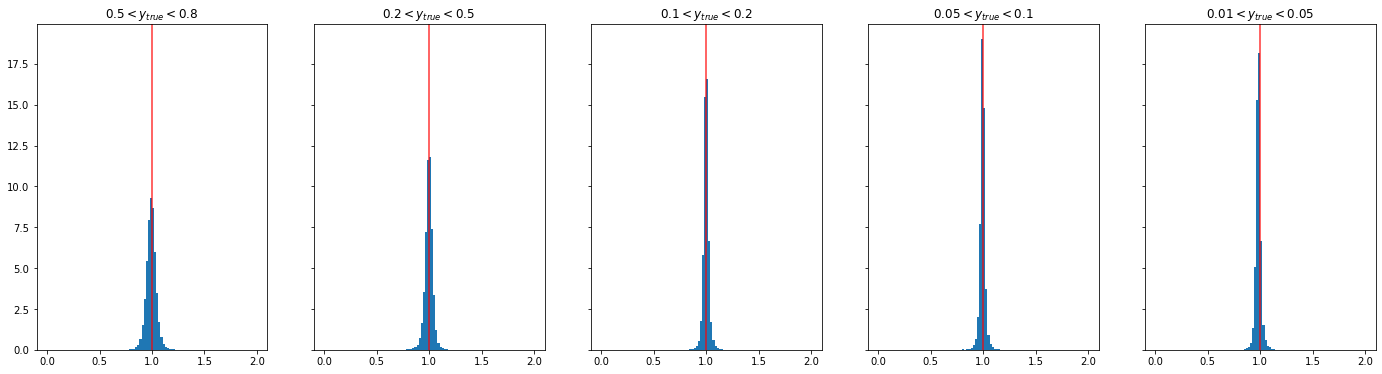

In [47]:
fig,ax = plt.subplots(1,5,figsize=(24,6),sharey='row')

ax[0].hist(pred_vals[:,1][(GY3_test > 0.5)*(GY3_test < 0.8)]/true_vals[:,1][(GY3_test > 0.5)*(GY3_test < 0.8)], density=True,bins=100,range=(0,2))
ax[1].hist(pred_vals[:,1][(GY3_test > 0.2)*(GY3_test < 0.5)]/true_vals[:,1][(GY3_test > 0.2)*(GY3_test < 0.5)], density=True,bins=100,range=(0,2))
ax[2].hist(pred_vals[:,1][(GY3_test > 0.1)*(GY3_test < 0.2)]/true_vals[:,1][(GY3_test > 0.1)*(GY3_test < 0.2)], density=True,bins=100,range=(0,2))
ax[3].hist(pred_vals[:,1][(GY3_test > 0.05)*(GY3_test < 0.1)]/true_vals[:,1][(GY3_test > 0.05)*(GY3_test < 0.1)], density=True,bins=100,range=(0,2))
ax[4].hist(pred_vals[:,1][(GY3_test > 0.01)*(GY3_test < 0.05)]/true_vals[:,1][(GY3_test > 0.01)*(GY3_test < 0.05)], density=True,bins=100,range=(0,2))






ax[0].set_title('$0.5<y_{true}<0.8$')
ax[1].set_title('$0.2<y_{true}<0.5$')
ax[2].set_title('$0.1<y_{true}<0.2$')
ax[3].set_title('$0.05<y_{true}<0.1$')
ax[4].set_title('$0.01<y_{true}<0.05$')


for i in range(5):
    ax[i].axvline(1.0,color='red',lw=2,alpha=0.6)
    
plt.show()

## Standard comparison plots

In [29]:

pandas_df.eval('s = 4*27.6*920', inplace=True)
pandas_df.eval('x_e = Q2_e/(s*y_e)',inplace=True)
pandas_df.eval('x_da = Q2_da/(s*y_da)',inplace=True)
pandas_df.eval('x_sigma = Q2_sigma/(s*y_sigma)',inplace=True)
pandas_df.eval('x_esigma = x_sigma',inplace=True)



pandas_df.eval('gen_x= gen_Q2/(s*gen_y)', inplace=True)   

pandas_df.eval('xe_ratio = x_e/gen_x',inplace=True)
pandas_df.eval('xda_ratio = x_da/gen_x',inplace=True)
pandas_df.eval('xsigma_ratio = x_sigma/gen_x',inplace=True)
pandas_df.eval('xesigma_ratio = x_esigma/gen_x',inplace=True)
        

['gen_y>0.5 and gen_y<0.8' 'gen_y>0.2 and gen_y<0.5'
 'gen_y>0.1 and gen_y<0.2' 'gen_y>0.05 and gen_y<0.1'
 'gen_y>0.01 and gen_y<0.05']
gen_y>0.5 and gen_y<0.8
gen_y>0.2 and gen_y<0.5
gen_y>0.1 and gen_y<0.2
gen_y>0.05 and gen_y<0.1
gen_y>0.01 and gen_y<0.05


/usr/lib/python3/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/lib/python3/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


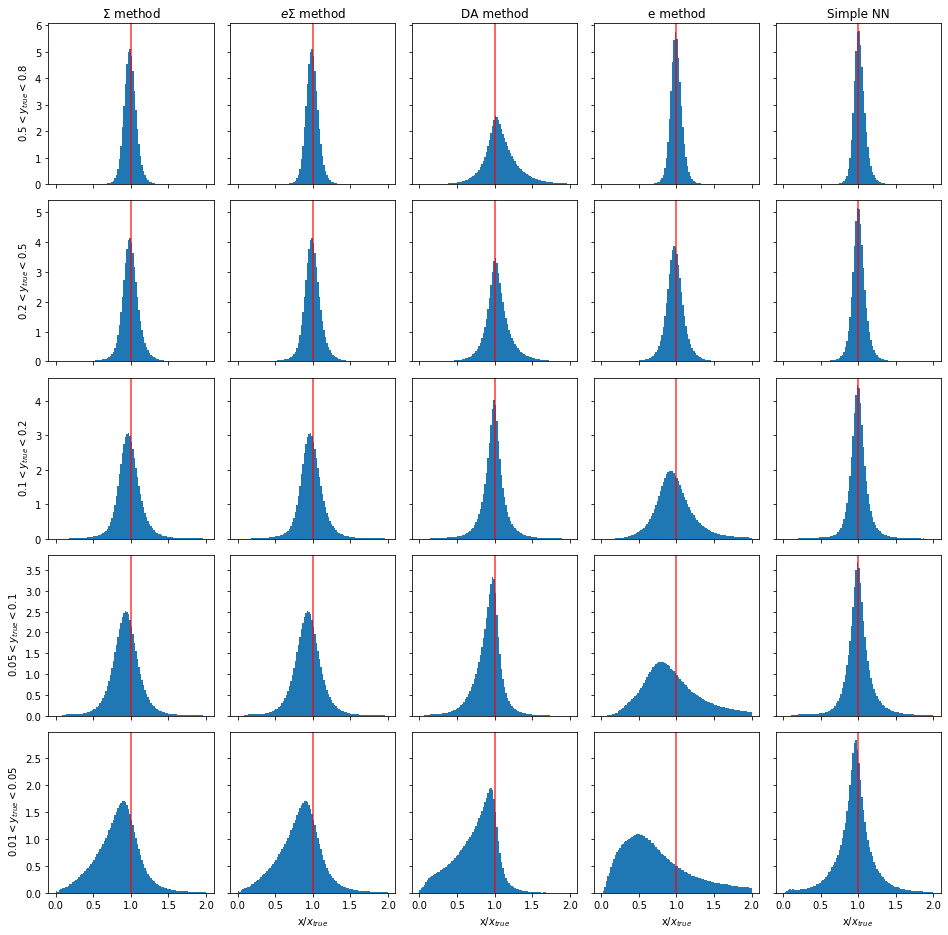

In [30]:
fig,ax = plt.subplots(5,5,figsize=(16,16),sharey='row',sharex=True)
ax = ax.flatten()
ybins = np.array(['gen_y>0.5 and gen_y<0.8', 'gen_y>0.2 and gen_y<0.5',
                  'gen_y>0.1 and gen_y<0.2', 'gen_y>0.05 and gen_y<0.1','gen_y>0.01 and gen_y<0.05'])
print(ybins)

xmin=0.
xmax=2.

for i in range(5):
    print(ybins[i])
    ax[0 + 5*i].hist(pandas_df.query(ybins[i])['xsigma_ratio'],density=True,bins=100,range=(xmin,xmax))
    ax[1 + 5*i].hist(pandas_df.query(ybins[i])['xesigma_ratio'],density=True,bins=100,range=(xmin,xmax))
    ax[2 + 5*i].hist(pandas_df.query(ybins[i])['xda_ratio'],density=True,bins=100,range=(xmin,xmax))
    ax[3 + 5*i].hist(pandas_df.query(ybins[i])['xe_ratio'],density=True,bins=100,range=(xmin,xmax))

ax[4].hist(np.exp(scalerY3.inverse_transform(mypreds3[:,0]))[(GY3_test > 0.5)*(GY3_test < 0.8)]/np.exp(scalerY3.inverse_transform(Y3_test))[(GY3_test > 0.5)*(GY3_test < 0.8)][:,0],density=True,bins=100,range=(xmin,xmax))
ax[9].hist(np.exp(scalerY3.inverse_transform(mypreds3[:,0]))[(GY3_test > 0.2)*(GY3_test < 0.5)]/np.exp(scalerY3.inverse_transform(Y3_test))[(GY3_test > 0.2)*(GY3_test < 0.5)][:,0],density=True,bins=100,range=(xmin,xmax))
ax[14].hist(np.exp(scalerY3.inverse_transform(mypreds3[:,0]))[(GY3_test > 0.1)*(GY3_test < 0.2)]/np.exp(scalerY3.inverse_transform(Y3_test))[(GY3_test > 0.1)*(GY3_test < 0.2)][:,0],density=True,bins=100,range=(xmin,xmax))
ax[19].hist(np.exp(scalerY3.inverse_transform(mypreds3[:,0]))[(GY3_test > 0.05)*(GY3_test < 0.1)]/np.exp(scalerY3.inverse_transform(Y3_test))[(GY3_test > 0.05)*(GY3_test < 0.1)][:,0],density=True,bins=100,range=(xmin,xmax))
ax[24].hist(np.exp(scalerY3.inverse_transform(mypreds3[:,0]))[(GY3_test > 0.01)*(GY3_test < 0.05)]/np.exp(scalerY3.inverse_transform(Y3_test))[(GY3_test > 0.01)*(GY3_test < 0.05)][:,0],density=True,bins=100,range=(xmin,xmax))
    
for i in range(len(ax.flatten())):
    ax[i].axvline(1.0,color='red',lw=2,alpha=0.6)
#ax[1].set_title(r"$\bf{ATHENA}$"+' full simulation [DD4hep] \n Pythia8+Geant4, NC DIS 18x275 GeV, $Q^{2}>100$ GeV$^{2}$',fontsize=29)
    ax[i].set_xticks([],minor=True)
    ax[i].set_yticks([], minor=True)
    #ax[i].set_yscale('log')
    # for minor ticks
    #ax[i].set_xticks([], minor=True)

plt.subplots_adjust(wspace=0.1, hspace=0.1)

ax[3].set_title('e method')
ax[2].set_title('DA method')
ax[0].set_title('$\Sigma$ method')
ax[1].set_title('$e\Sigma$ method')
ax[4].set_title('Simple NN')


ax[0].set_ylabel(' $0.5<y_{true}<0.8$')
ax[4+1].set_ylabel(' $0.2<y_{true}<0.5$')
ax[8+1+1].set_ylabel(' $0.1<y_{true}<0.2$')
ax[12+1+1+1].set_ylabel(' $0.05<y_{true}<0.1$')
ax[16+1+1+1+1].set_ylabel(' $0.01<y_{true}<0.05$')
ax[-1].set_xlabel(r'x/$x_{true}$ ')

ax[-2].set_xlabel(r'x/$x_{true}$ ')
ax[-3].set_xlabel(r'x/$x_{true}$ ')
ax[-4].set_xlabel(r'x/$x_{true}$ ')


plt.show()

## Make standard plots with the x axis zoomed in more near 1.

['gen_y>0.5 and gen_y<0.8' 'gen_y>0.2 and gen_y<0.5'
 'gen_y>0.1 and gen_y<0.2' 'gen_y>0.05 and gen_y<0.1'
 'gen_y>0.01 and gen_y<0.05']
gen_y>0.5 and gen_y<0.8
gen_y>0.2 and gen_y<0.5
gen_y>0.1 and gen_y<0.2
gen_y>0.05 and gen_y<0.1
gen_y>0.01 and gen_y<0.05


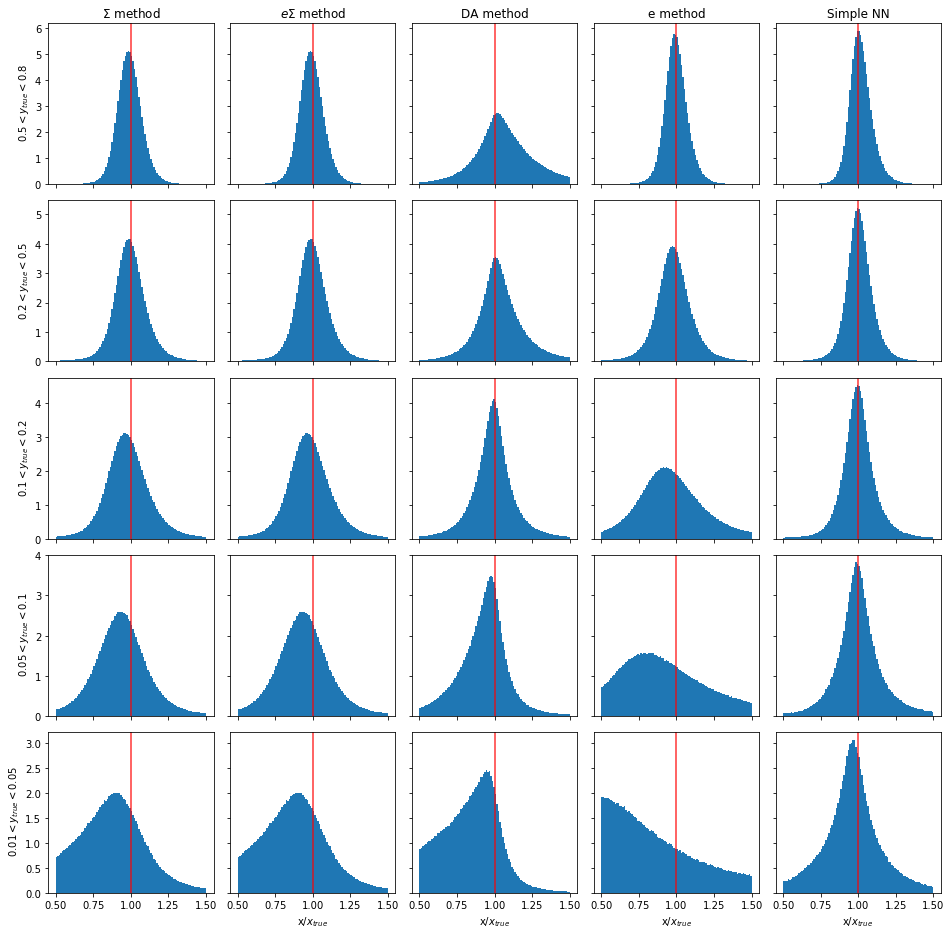

In [31]:
fig,ax = plt.subplots(5,5,figsize=(16,16),sharey='row',sharex=True)
ax = ax.flatten()
ybins = np.array(['gen_y>0.5 and gen_y<0.8', 'gen_y>0.2 and gen_y<0.5',
                  'gen_y>0.1 and gen_y<0.2', 'gen_y>0.05 and gen_y<0.1','gen_y>0.01 and gen_y<0.05'])
print(ybins)

xmin=0.5
xmax=1.5

for i in range(5):
    print(ybins[i])
    ax[0 + 5*i].hist(pandas_df.query(ybins[i])['xsigma_ratio'],density=True,bins=100,range=(xmin,xmax))
    ax[1 + 5*i].hist(pandas_df.query(ybins[i])['xesigma_ratio'],density=True,bins=100,range=(xmin,xmax))
    ax[2 + 5*i].hist(pandas_df.query(ybins[i])['xda_ratio'],density=True,bins=100,range=(xmin,xmax))
    ax[3 + 5*i].hist(pandas_df.query(ybins[i])['xe_ratio'],density=True,bins=100,range=(xmin,xmax))

ax[4].hist(np.exp(scalerY3.inverse_transform(mypreds3[:,0]))[(GY3_test > 0.5)*(GY3_test < 0.8)]/np.exp(scalerY3.inverse_transform(Y3_test))[(GY3_test > 0.5)*(GY3_test < 0.8)][:,0],density=True,bins=100,range=(xmin,xmax))
ax[9].hist(np.exp(scalerY3.inverse_transform(mypreds3[:,0]))[(GY3_test > 0.2)*(GY3_test < 0.5)]/np.exp(scalerY3.inverse_transform(Y3_test))[(GY3_test > 0.2)*(GY3_test < 0.5)][:,0],density=True,bins=100,range=(xmin,xmax))
ax[14].hist(np.exp(scalerY3.inverse_transform(mypreds3[:,0]))[(GY3_test > 0.1)*(GY3_test < 0.2)]/np.exp(scalerY3.inverse_transform(Y3_test))[(GY3_test > 0.1)*(GY3_test < 0.2)][:,0],density=True,bins=100,range=(xmin,xmax))
ax[19].hist(np.exp(scalerY3.inverse_transform(mypreds3[:,0]))[(GY3_test > 0.05)*(GY3_test < 0.1)]/np.exp(scalerY3.inverse_transform(Y3_test))[(GY3_test > 0.05)*(GY3_test < 0.1)][:,0],density=True,bins=100,range=(xmin,xmax))
ax[24].hist(np.exp(scalerY3.inverse_transform(mypreds3[:,0]))[(GY3_test > 0.01)*(GY3_test < 0.05)]/np.exp(scalerY3.inverse_transform(Y3_test))[(GY3_test > 0.01)*(GY3_test < 0.05)][:,0],density=True,bins=100,range=(xmin,xmax))
    
for i in range(len(ax.flatten())):
    ax[i].axvline(1.0,color='red',lw=2,alpha=0.6)
#ax[1].set_title(r"$\bf{ATHENA}$"+' full simulation [DD4hep] \n Pythia8+Geant4, NC DIS 18x275 GeV, $Q^{2}>100$ GeV$^{2}$',fontsize=29)
    ax[i].set_xticks([],minor=True)
    ax[i].set_yticks([], minor=True)
    #ax[i].set_yscale('log')
    # for minor ticks
    #ax[i].set_xticks([], minor=True)

plt.subplots_adjust(wspace=0.1, hspace=0.1)

ax[3].set_title('e method')
ax[2].set_title('DA method')
ax[0].set_title('$\Sigma$ method')
ax[1].set_title('$e\Sigma$ method')
ax[4].set_title('Simple NN')


ax[0].set_ylabel(' $0.5<y_{true}<0.8$')
ax[4+1].set_ylabel(' $0.2<y_{true}<0.5$')
ax[8+1+1].set_ylabel(' $0.1<y_{true}<0.2$')
ax[12+1+1+1].set_ylabel(' $0.05<y_{true}<0.1$')
ax[16+1+1+1+1].set_ylabel(' $0.01<y_{true}<0.05$')
ax[-1].set_xlabel(r'x/$x_{true}$ ')

ax[-2].set_xlabel(r'x/$x_{true}$ ')
ax[-3].set_xlabel(r'x/$x_{true}$ ')
ax[-4].set_xlabel(r'x/$x_{true}$ ')


plt.show()